# Resources

- [Networks, Crowds & Markets](http://www.cs.cornell.edu/home/kleinber/networks-book/) (free!)

- Matthew O. Jackson's book on [Social and economic networks](https://web.stanford.edu/~jacksonm/books.html)

- Graph algorithms in typical CS algorithms course
  - CLRS textbook
  - Skiena textbook
  - Coursera algorithms course (parts 10 and on)

- [NetworkX](https://networkx.github.io/documentation/stable/) python library

# Networks AKA Graphs

The graph is the mathematical object representing a network.  This is powerful because it can represent any kind of structure where relations between objects matter. Here are examples:

- Social networks (Facebook friends, Twitter followers, etc.)

- Structural networks (internet hyperlink graph, transportation networks, matching markets, etc.)

- Interaction networks (Mastercard's transaction network, word co-occurence networks in NLP, chemical interaction networks)

- Tree networks. For instance the decisions you can possibly take in chess can be modeled as a [decision tree](https://en.wikipedia.org/wiki/Decision_tree). 

Because of this flexibility, graphs are used all over the place in computer science. Neural networks are based on a graph model (hence the "network" part). Most social apps depends critically on their user network. Most game AI are based around [tree search](https://en.wikipedia.org/wiki/Game_tree). They're used to model disease diffusion and contagion, etc. etc.



Start with importing the [networkX library](https://networkx.github.io/documentation/stable/) which is good for small to medium sized graphs. Let's start by drawing the [petersen graph](https://en.wikipedia.org/wiki/Petersen_graph):

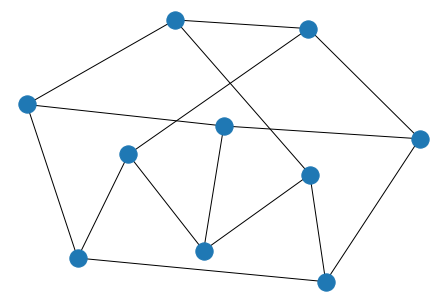

In [2]:
import networkx as nx

G = nx.petersen_graph()
nx.draw(G)

Right away we'll notice that graphs are complex objects. 

If we draw the Petersen Graph differently a much clearer structure emerges:

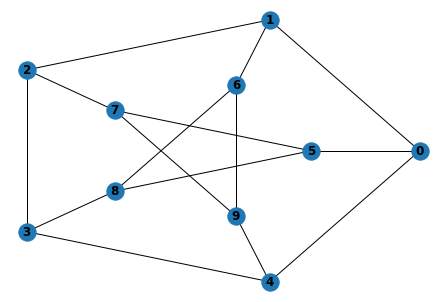

In [11]:
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

First we note a few things. A graph is made of two types of data:

- **Nodes** also sometimes called **vertices** are the endpoints. In a social networks there would be one per user. Nodes can have types or other associated data

- **Edges** are the relations between nodes. Edges can have a direction (from node A to node B) or not (go both ways). Edges can also have **weights** (a number attached to the edge). For example, you could attach the number of interactions between two users to their edge in a social network, this way users who are close friends would be "more attached" than mere acquaintances.

We generally make a clear distinction between **directed graphs** (graphs with directed edges) and **undirected graphs** (graphs where all edges go both ways). This is because the algorithms are generally specialized.

An undirected edge in a directed graph is generally represented by two edges (one for each direction). A directed graph is depicted in networkX with "arrow edges":

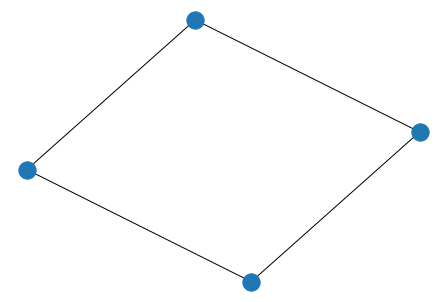

In [3]:
# Making a graph from edges list
# This is a square
G = nx.Graph([(1,2), (2,3), (3,4), (4,1)])
nx.draw(G)

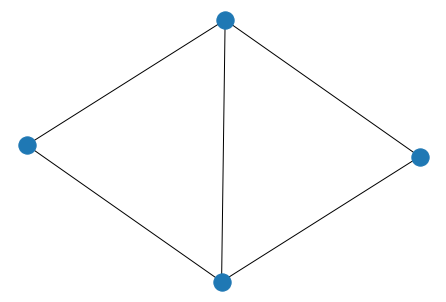

In [6]:
# Add a diagonal edge
G.add_edge(2, 4)
nx.draw(G)

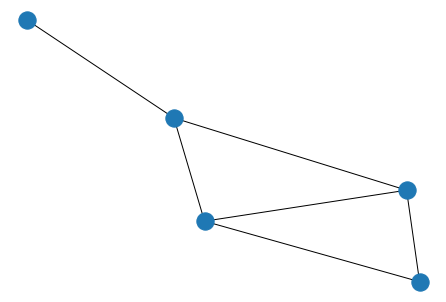

In [7]:
# Add a 5th node and an edge
G.add_node(5)
G.add_edge(5, 1)
nx.draw(G)

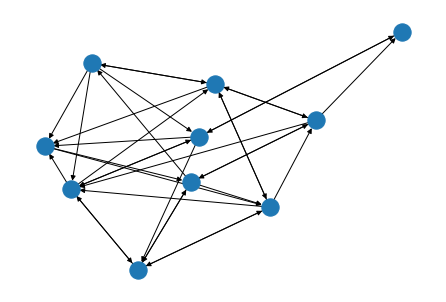

In [23]:
G = nx.binomial_graph(10, 0.3, directed=True)
nx.draw(G)

In NetworkX, we access a node by its **Node ID** (normally a number, but can be anything). This is used with the `[]` bracket operator, like lists or dicts:

In [32]:
G[3]

AtlasView({2: {}, 4: {}, 6: {}, 9: {}})

### Edge List representation

The edge list is a simple way to represent a graph as a list of $(source, destination)$ tuples

We can also view the **edge list** directly:

In [33]:
G.edges

OutEdgeView([(0, 1), (0, 4), (0, 5), (0, 8), (1, 0), (1, 3), (1, 4), (1, 5), (2, 1), (2, 3), (2, 7), (2, 8), (3, 2), (3, 4), (3, 6), (3, 9), (4, 7), (4, 9), (5, 1), (5, 7), (5, 9), (6, 0), (6, 1), (6, 3), (6, 4), (7, 2), (7, 5), (7, 6), (7, 9), (8, 0), (9, 1), (9, 2), (9, 3), (9, 5)])



### Adjacency Matrix representation

A common way to represent a graph is with an [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) -- a matrix where each row and each column represent a node, and the entry is 0 if there's no edge and 1 if there is an edge:



In [24]:
import numpy as np

nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
        [1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 1, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 1, 0, 0, 0, 0]], dtype=int64)

(if the edges had weights, the $1$ entries would be replaced with the edge weight instead)

Note that adjacency matrices, though they represent a graph, are valid matrices so all of [linear algebra](https://en.wikipedia.org/wiki/Linear_algebra) (which we'll go over later on) is valid.

For instance, one aspect of matrices which is important is the [eigenvalues](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) and the eigenvalues of a graph's matrix is a topic which is heavily studied.

# Graph search

Our first hands-on application on graphs will be to implement some simple [graph traversal](https://en.wikipedia.org/wiki/Graph_traversal) algorithms. 

The two basic search algorithms are [Breadth-first search](https://en.wikipedia.org/wiki/Breadth-first_search) (BFS) and [depth-first search](https://en.wikipedia.org/wiki/Depth-first_search) (DFS).

Graph traversal can be used for lots of things:

- Discover if a graph is connected or not (eg. if you can always get from one node to another)

- Generate driving directions (eg. find the optimal path from A to B)

- Compute clusters or connected components on a graph

To learn BFS, we first have to learn about queues.

### The queue and data structures

The queue is our first encounter with what computer scientists call a **data structure**. 

A [data structure](https://en.wikipedia.org/wiki/Data_structure) is a logical way to organize and operate on data. You can think of it in terms of a python `class`, but you don't have to wrap a data structure into a class for it to work as intended.

The **queue** acts like a list, but has one main rule called **First-in-First-out**. This means the following rules:

- You can only ever add data to a queue one object at a time

- If you remove an object it has to be the one at the front of the queue (the one added the earliest)

Lists be represented with `list.pop(0)` in python.


In [1]:
#### Exercise (5min): Make a Queue class
#### It should subclass the **list** object
### have two methods -- add(node) -- remove()



### Solution
class Queue(list):
  def add(node):
    self.append(node)

  def remove():
    self.pop(0)

## Breadth-First Search

BFS explores the graph in "layers" around the node where we start the search. It first looks at all nodes 1 level away from the start node, then all nodes 2 levels away, etc. until we find all connected nodes to the starting node or ask it to stop.

Here is the **BFS pseudocode**

```
let L be a list of explored nodes
Mark the origin node S as explored
Let Q be a queue initialized with S
While Q is not empty:
  remove first node of Q, call it V
  for each edge (v, w):
    if w is not explored:
      mark w as explored
      add w to the end of Q
```

In [ ]:
### Exercise: implement BFS (25-40 min)
###    You don't have to use the queue class


### Solution:
def bfs(graph, start):
    visited = set()
    queue = [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/

# Depth-First Search

DFS is the opposite of BFS. It picks an edge from the origin node, then descends as deeply as possible down that path until it gets blocked. Then it backtracks to the second edge connected to our original node and does the same.

### Stack data structure

The stack is the inverse of the Queue data structure, it's a **Last-In-First-Out** model. So when removing from a stack, we remove the most recently added element instead.

In [35]:
### Exercise: implement DFS (25-40 min)

### Solution:
def dfs(graph, start):
    visited = set()
    stack = [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited